In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import tensorflow as tf

In [28]:
df = pd.read_excel('./data/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [29]:
df.columns = ['cement', 'furnace', 'ash', 'water','superplasticizer','coarse', 'fine', 'age', 'strength']

In [30]:
# strength를 예측하는 neural network model을 만들고 평가하시오

In [31]:
df.shape

(1030, 9)

In [32]:
df.values

array([[540.        ,   0.        ,   0.        , ..., 676.        ,
         28.        ,  79.98611076],
       [540.        ,   0.        ,   0.        , ..., 676.        ,
         28.        ,  61.88736576],
       [332.5       , 142.5       ,   0.        , ..., 594.        ,
        270.        ,  40.26953526],
       ...,
       [148.5       , 139.4       , 108.6       , ..., 780.        ,
         28.        ,  23.69660064],
       [159.1       , 186.7       ,   0.        , ..., 788.9       ,
         28.        ,  32.76803638],
       [260.9       , 100.5       ,  78.3       , ..., 761.5       ,
         28.        ,  32.40123514]])

In [33]:
y = df.values[:,8]
x = df.values[:,:8]

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=111)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [36]:
# regression 모델
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Dense(256,input_dim = 8, activation = 'relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(56, activation='relu'))
    model.add(Dense(28, activation='relu'))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer= 'adam')

In [37]:
hist = model.fit(x_train_sc,y_train, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
62/62 [==============================] - 1s 6ms/step - loss: 730.7977 - val_loss: 221.7264
Epoch 2/50
62/62 [==============================] - 0s 5ms/step - loss: 160.4092 - val_loss: 156.8782
Epoch 3/50
62/62 [==============================] - 0s 6ms/step - loss: 129.1618 - val_loss: 129.5698
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 119.5080 - val_loss: 120.9906
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 112.4469 - val_loss: 109.0646
Epoch 6/50
62/62 [==============================] - 0s 3ms/step - loss: 99.8741 - val_loss: 104.5193
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 88.5269 - val_loss: 91.3188
Epoch 8/50
62/62 [==============================] - 0s 4ms/step - loss: 78.8235 - val_loss: 78.3843
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss: 69.5106 - val_loss: 67.7843
Epoch 10/50
62/62 [==============================] - 0s 3ms/step - loss: 62.4388 - val_lo

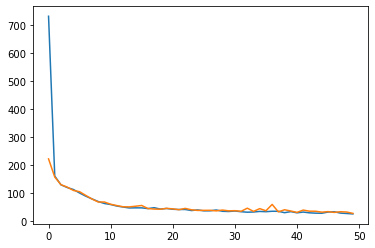

In [38]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [50]:
model.evaluate(x_test_sc,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 38.2469


38.24688720703125

In [51]:
preds = model.predict(x_test_sc)
preds

array([[44.47082  ],
       [29.3354   ],
       [28.59008  ],
       [32.545994 ],
       [53.74469  ],
       [34.598873 ],
       [17.33588  ],
       [14.50626  ],
       [22.386972 ],
       [19.3953   ],
       [35.917023 ],
       [31.97966  ],
       [36.835777 ],
       [52.280846 ],
       [40.04315  ],
       [56.197605 ],
       [31.066458 ],
       [21.92914  ],
       [38.449505 ],
       [18.062824 ],
       [17.762138 ],
       [27.985403 ],
       [27.592134 ],
       [23.91423  ],
       [41.22939  ],
       [36.348984 ],
       [22.677042 ],
       [19.080227 ],
       [61.35814  ],
       [48.614304 ],
       [58.09841  ],
       [36.556034 ],
       [45.918583 ],
       [36.754227 ],
       [26.97804  ],
       [39.697697 ],
       [35.38225  ],
       [39.949078 ],
       [41.359917 ],
       [32.886803 ],
       [76.808846 ],
       [48.401325 ],
       [26.337378 ],
       [33.855583 ],
       [42.123337 ],
       [30.200243 ],
       [40.279762 ],
       [15.07

In [52]:
preds = [v[0] for v in preds]
preds

[44.47082,
 29.3354,
 28.59008,
 32.545994,
 53.74469,
 34.598873,
 17.33588,
 14.50626,
 22.386972,
 19.3953,
 35.917023,
 31.97966,
 36.835777,
 52.280846,
 40.04315,
 56.197605,
 31.066458,
 21.92914,
 38.449505,
 18.062824,
 17.762138,
 27.985403,
 27.592134,
 23.91423,
 41.22939,
 36.348984,
 22.677042,
 19.080227,
 61.35814,
 48.614304,
 58.09841,
 36.556034,
 45.918583,
 36.754227,
 26.97804,
 39.697697,
 35.38225,
 39.949078,
 41.359917,
 32.886803,
 76.808846,
 48.401325,
 26.337378,
 33.855583,
 42.123337,
 30.200243,
 40.279762,
 15.078051,
 30.807774,
 23.121521,
 46.526127,
 61.11442,
 34.400517,
 35.624176,
 43.29028,
 50.503662,
 50.38848,
 39.272068,
 36.51573,
 28.883694,
 37.12136,
 13.059416,
 48.32183,
 29.508772,
 65.38518,
 25.395716,
 17.274214,
 48.48651,
 53.550236,
 71.26418,
 40.296604,
 42.102875,
 43.30178,
 35.723263,
 46.848137,
 24.121706,
 12.172249,
 62.995636,
 54.80892,
 52.96937,
 53.6153,
 37.44755,
 36.25908,
 47.285713,
 40.17285,
 73.48397,
 6.9

In [53]:
# 실제값과 비교 


In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.8652594037425154

In [55]:
for i in zip(y_test,preds):
    print(i)

(47.739318239999996, 44.47082)
(30.44726016, 29.3354)
(42.29245784, 28.59008)
(32.922478999999996, 32.545994)
(65.909079268, 53.74469)
(26.22766704, 34.598873)
(20.96696516, 17.33588)
(10.53519328, 14.50626)
(23.221551679999997, 22.386972)
(13.395533715270679, 19.3953)
(33.05347944, 35.917023)
(42.79577532, 31.97966)
(36.44570136, 36.835777)
(52.82075636, 52.280846)
(37.34202016, 40.04315)
(62.935369279999996, 56.197605)
(33.72916592, 31.066458)
(29.7508894, 21.92914)
(24.40055564, 38.449505)
(24.44881896, 18.062824)
(20.08443588, 17.762138)
(32.039949719999996, 27.985403)
(18.287661424, 27.592134)
(34.23937816, 23.91423)
(49.20100736, 41.22939)
(50.60064364, 36.348984)
(21.917063088, 22.677042)
(15.091250688, 19.080227)
(64.30053176, 61.35814)
(41.934619796, 48.614304)
(68.29949256, 58.09841)
(39.056057496, 36.556034)
(44.38846488, 45.918583)
(33.398217439999996, 36.754227)
(30.2335226, 26.97804)
(34.73580088, 39.697697)
(33.5430074, 35.38225)
(39.45181672, 39.949078)
(48.846616696, 4